### Please complete the following sections sequentially to complete this assignment.

##### <span style="color:red">Note: You can create as many code or markdown cells as you deem necessary to answer each question. However, please leave the problems unchanged. We will evaluate your solutions by executing your code sequentially.</span> 
---

**Within the expansion of the Internet and Web, there has also been a growing interest in online articles and reviews, which allows an easy and fast spread of information worldwide. Thus, predicting the popularity of online news has become a trend. Popularity is often measured by considering the number of interactions in the Web and social networks (e.g., number of shares, likes, and comments). Predicting such popularity is valuable for advertisers, authors, content providers, and even activists/politicians (e.g., to understand or influence public opinion). In this assignment, we use a news popularity dataset utilized by Fernandes et al. (2015) based on the articles published by [Mashable](https://mashable.com/) from January 7, 2013, to January 7, 2015.**

**<span style="color:red">The objective of this assignment is to predict whether or not a news article becomes popular. </span> The assignment's dataset is included in the homework's zipped folder. Table below has the description of each variable in the dataset.**

| Variable                      | Description                                                                       |
|-------------------------------|-----------------------------------------------------------------------------------|
| url                           | URL of the article (non-predictive)                                               |
| timedelta                     | Days between the article publication and the dataset acquisition (non-predictive) |
| n_tokens_title                | Number of words in the title                                                      |
| n_tokens_content              | Number of words in the content                                                    |
| n_unique_tokens               | Rate of unique words in the content                                               |
| n_non_stop_words              | Rate of non-stop words in the content                                             |
| n_non_stop_unique_tokens      | Rate of unique non-stop words in the content                                      |
| num_hrefs                     | Number of links                                                                   |
| num_self_hrefs                | Number of links to other articles published by Mashable                           |
| num_imgs                      | Number of images                                                                  |
| num_videos                    | Number of videos                                                                  |
| average_token_length          | Average length of the words in the content                                        |
| num_keywords                  | Number of keywords in the metadata                                                |
| data_channel_is_lifestyle     | Is data channel 'Lifestyle'?                                                      |
| data_channel_is_entertainment | Is data channel 'Entertainment'?                                                  |
| data_channel_is_bus           | Is data channel 'Business'?                                                       |
| data_channel_is_socmed        | Is data channel 'Social Media'?                                                   |
| data_channel_is_tech          | Is data channel 'Tech'?                                                           |
| data_channel_is_world         | Is data channel 'World'?                                                          |
| kw_min_min                    | Min. shares of the Worst keyword in the article                                   |
| kw_max_min                    | Max. shares of the Worst keyword in the article                                   |
| kw_avg_min                    | Avg. shares of the Worst keyword in the article                                   |
| kw_min_max                    | Min. shares of the best keyword in the article                                    |
| kw_max_max                    | Max. shares of the best keyword in the article                                    |
| kw_avg_max                    | Avg. shares of the best keyword in the article                                    |
| kw_min_avg                    | Min. shares of the average keyword in the article                                 |
| kw_max_avg                    | Max. shares of the average keyword in the article                                 |
| kw_avg_avg                    | Avg. shares of the average keyword in the article                                 |
| self_reference_min_shares     | Min. shares of referenced articles in Mashable                                    |
| self_reference_max_shares     | Max. shares of referenced articles in Mashable                                    |
| self_reference_avg_sharess    | Avg. shares of referenced articles in Mashable                                    |
| weekday_is_monday             | Was the article published on a Monday?                                            |
| weekday_is_tuesday            | Was the article published on a Tuesday?                                           |
| weekday_is_wednesday          | Was the article published on a Wednesday?                                         |
| weekday_is_thursday           | Was the article published on a Thursday?                                          |
| weekday_is_friday             | Was the article published on a Friday?                                            |
| weekday_is_saturday           | Was the article published on a Saturday?                                          |
| weekday_is_sunday             | Was the article published on a Sunday?                                            |
| is_weekend                    | Was the article published on the weekend?                                         |
| LDA_00                        | Closeness to LDA topic 0                                                          |
| LDA_01                        | Closeness to LDA topic 1                                                          |
| LDA_02                        | Closeness to LDA topic 2                                                          |
| LDA_03                        | Closeness to LDA topic 3                                                          |
| LDA_04                        | Closeness to LDA topic 4                                                          |
| global_subjectivity           | Text subjectivity                                                                 |
| global_sentiment_polarity     | Text sentiment polarity                                                           |
| global_rate_positive_words    | Rate of positive words in the content                                             |
| global_rate_negative_words    | Rate of negative words in the content                                             |
| rate_positive_words           | Rate of positive words among non-neutral tokens                                   |
| rate_negative_words           | Rate of negative words among non-neutral tokens                                   |
| avg_positive_polarity         | Avg. polarity of positive words                                                   |
| min_positive_polarity         | Min. polarity of positive words                                                   |
| max_positive_polarity         | Max. polarity of positive words                                                   |
| avg_negative_polarity         | Avg. polarity of negative words                                                   |
| min_negative_polarity         | Min. polarity of negative words                                                   |
| max_negative_polarity         | Max. polarity of negative words                                                   |
| title_subjectivity            | Title subjectivity                                                                |
| title_sentiment_polarity      | Title polarity                                                                    |
| abs_title_subjectivity        | Absolute subjectivity level                                                       |
| abs_title_sentiment_polarity  | Absolute polarity level                                                           |
| shares (DO NOT USE)            | Number of shares                                                                  |
| **popular (Target)**          | **whether the article is popular (yes/no)**                                       |

Reference:

Fernandes, K., Vinagre, P., & Cortez, P. (2015, September). A proactive intelligent decision support system for predicting the popularity of online news. In Portuguese Conference on Artificial Intelligence (pp. 535-546). Springer, Cham.

---
### Data Exploration

**Note: Before starting the assignment, import all necessary libraries and read the dataset into the Python environment.**

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from pydotplus import graph_from_dot_data

**1- Explore the data by creating <span style="color:red">three </span> meaningful visualizations and interpreting them. Write your interpretations in a markdown cell. (30 pts)**

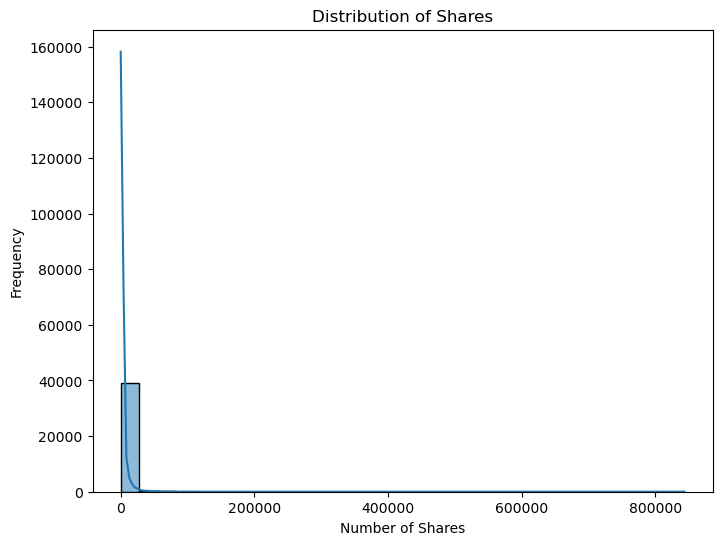

In [13]:
df = pd.read_csv("online_news_popularity.csv")
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='shares', bins=30, kde=True)
plt.title('Distribution of Shares')
plt.xlabel('Number of Shares')
plt.ylabel('Frequency')
plt.show()

In [14]:
#This shows the distribution of shares among online news.

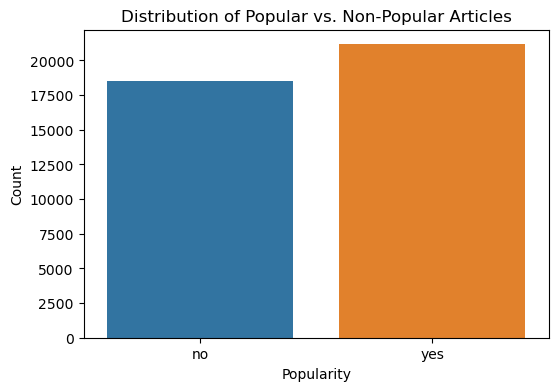

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='popular')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.title('Distribution of Popular vs. Non-Popular Articles')
plt.show()

In [ ]:
#This shows a comparison between popular vs non-popular articles.

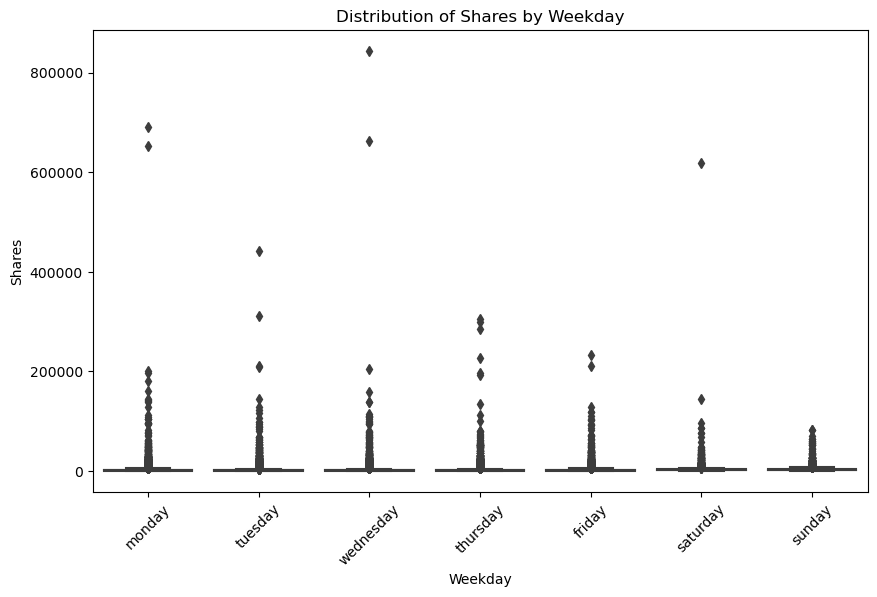

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weekday', y='shares', data=df)
plt.title('Distribution of Shares by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Shares')
plt.xticks(rotation=45)
plt.show()

In [21]:
# This graph shows the high variability of shares across different days of the week.

**2- Explore the data by creating <span style="color:red">three </span> meaningful summary tables and interpreting them. Write your interpretations in a markdown cell. (30 pts)**

In [22]:
summary_stats = df.describe().transpose()
summary_stats

,count,mean,std,min,25%,50%,75%,max
timedelta,39644.0,354.530471,214.163767,8.00000,164.000000,339.000000,542.000000,731.000000
n_tokens_title,39644.0,10.398749,2.114037,2.00000,9.000000,10.000000,12.000000,23.000000
n_tokens_content,39644.0,546.514731,471.107508,0.00000,246.000000,409.000000,716.000000,8474.000000
n_unique_tokens,39644.0,0.548216,3.520708,0.00000,0.470870,0.539226,0.608696,701.000000
n_non_stop_words,39644.0,0.996469,5.231231,0.00000,1.000000,1.000000,1.000000,1042.000000
n_non_stop_unique_tokens,39644.0,0.689175,3.264816,0.00000,0.625739,0.690476,0.754630,650.000000
num_hrefs,39644.0,10.883690,11.332017,0.00000,4.000000,8.000000,14.000000,304.000000
num_self_hrefs,39644.0,3.293638,3.855141,0.00000,1.000000,3.000000,4.000000,116.000000
num_imgs,39644.0,4.544143,8.309434,0.00000,1.000000,1.000000,4.000000,128.000000
num_videos,39644.0,1.249874,4.107855,0.00000,0.000000,0.000000,1.000000,91.000000


In [23]:
#This table provides descriptive statisitics for different numerical variables that are in the dataset.

In [32]:
numerical_summary = df.describe().transpose()
print(numerical_summary)

                                count           mean            std      min  \
timedelta                     39644.0     354.530471     214.163767  8.00000   
n_tokens_title                39644.0      10.398749       2.114037  2.00000   
n_tokens_content              39644.0     546.514731     471.107508  0.00000   
n_unique_tokens               39644.0       0.548216       3.520708  0.00000   
n_non_stop_words              39644.0       0.996469       5.231231  0.00000   
n_non_stop_unique_tokens      39644.0       0.689175       3.264816  0.00000   
num_hrefs                     39644.0      10.883690      11.332017  0.00000   
num_self_hrefs                39644.0       3.293638       3.855141  0.00000   
num_imgs                      39644.0       4.544143       8.309434  0.00000   
num_videos                    39644.0       1.249874       4.107855  0.00000   
average_token_length          39644.0       4.548239       0.844406  0.00000   
num_keywords                  39644.0   

In [33]:
#This gives descriptive statistics for all of the numeric columns in the dataset.

In [36]:
count_by_weekend = df['is_weekend'].value_counts().to_frame(name='Count')
print(count_by_weekend)

            Count
is_weekend       
0           34454
1            5190


In [37]:
# This shows the number of articles posted on the weekend compared to weekdays.

---
### Introduction to Classification Trees

**3- Watch this [video](https://ohiouniversity.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=cc73a719-9a8e-4535-bf73-acd9001e59f1) for an intorudction to classification trees.**

**4- Define the Gini impurity and explain how it is calculated. (10 pts)**

Gini impurity is used in decision trees to measure the impurity(the disorder) in a classification problem. It represents how likely it is to misclassify a random sample. 

**5- Briefly describe how classification trees work. (10 pts)**

Classification trees are predictive models that create tree-like structures that repeatedly divide the data into smaller categories based on their features. The idea is to minimize impurity.

**6- Explain how feature importance is calculated for classification trees. (10 pts)**

This is calculated by finding out to what extent a feature influences the model's decision-making. This is found by measuring the average decrease in impurity caused by that feature across the nodes in the tree.

**7- What is pruning in classification trees? and wht is it needed? (10 pts)**

Pruning involves reducing the tree's size by removing nodes to prevent overfitting. This is needed because it enhances the model's performance on unseen data.

**8- Briefly explain how the cost-complexity pruning algorithm works. (10 pts)**

This pruning algorithm works by simplifying the tree structure. It aims to find a simpler tree without compromising predictive power by minimizing a combined cost metric involving accuracy and tree complexity.

**9- Why do we need to balance the data before training? (10 pts)**

It's important to balance the data before training in order to prevent the model from being biased towards the majority class. This allows for fairer and more accurate predictions across different classes.

---
### Classification Trees in Python

**10- Watch this [video](https://ohiouniversity.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=9a0fe3c9-b9a1-4049-bb46-acd9001e6cd6) to learn about implementing classification trees in Python. The video's dataset is included in the assignment zipped folder, in case you want to replicate the codes.**

**11- Check if there are any missing values and take care of them if needed. (10 pts)**

In [39]:
df.isna().sum()

url                             0
timedelta                       0
n_tokens_title                  0
n_tokens_content                0
n_unique_tokens                 0
n_non_stop_words                0
n_non_stop_unique_tokens        0
num_hrefs                       0
num_self_hrefs                  0
num_imgs                        0
num_videos                      0
average_token_length            0
num_keywords                    0
channel                         0
kw_min_min                      0
kw_max_min                      0
kw_avg_min                      0
kw_min_max                      0
kw_max_max                      0
kw_avg_max                      0
kw_min_avg                      0
kw_max_avg                      0
kw_avg_avg                      0
self_reference_min_shares       0
self_reference_max_shares       0
self_reference_avg_sharess      0
weekday                         0
is_weekend                      0
LDA_00                          0
LDA_01        

**12- Detect and eliminate the outliers of these variables: ```['LDA_02', 'LDA_03', 'LDA_04']``` (20 pts)**

In [40]:
df_clean = df.copy()
var_list = ['LDA_02', 'LDA_03', 'LDA_04']
for var in var_list:
    iqr = df_clean.quantile(0.75, numeric_only=True)[var] - df_clean.quantile(0.25, numeric_only=True)[var]
    ub = df_clean.quantile(0.75, numeric_only=True)[var] + 1.5 * iqr
    lb = df_clean.quantile(0.25, numeric_only=True)[var] - 1.5 * iqr
    df_clean = df_clean[(df_clean[var] <= ub) & (df_clean[var] >= lb)]
df_clean

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popular
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,no
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,no
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,yes
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,no
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39638,http://mashable.com/2014/12/27/protests-contin...,8,11,223,0.653153,1.0,0.825758,5,3,1,...,0.80,-0.250000,-0.250,-0.250000,0.000000,0.000000,0.500000,0.000000,1200,no
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8,11,346,0.529052,1.0,0.684783,9,7,1,...,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800,yes
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8,12,328,0.696296,1.0,0.885057,9,7,3,...,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900,yes
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8,10,442,0.516355,1.0,0.644128,24,1,12,...,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900,yes


**13- Dummy encode all categorical variables (Note: output variable should not be dummy encoded). (10 pts)**

In [41]:
df1 = pd.get_dummies(df_clean, columns=["channel", "weekday"], drop_first=True)
df1.head(2)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,channel_other,channel_social_media,channel_tech,channel_world,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,False,False,False,False,True,False,False,False,False,False
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,False,False,False,False,True,False,False,False,False,False


**14- Check if the data is imbalanced, and partition it accordingly (Consider 80% of the data as train). (20 pts)**

In [42]:
df1.groupby(by=["popular"]).size()

popular
no     16116
yes    19987
dtype: int64

In [44]:
var_list = ['timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min',
       'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'is_weekend',
       'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity',
       'channel_entertainment', 'channel_lifestyle', 'channel_other',
       'channel_social_media', 'channel_tech', 'channel_world',
       'weekday_monday', 'weekday_saturday', 'weekday_sunday',
       'weekday_thursday', 'weekday_tuesday', 'weekday_wednesday']
X = df1[var_list]
y = df1["popular"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [43]:
df1.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min',
       'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'is_weekend',
       'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_

**15- Using proper input variables, build a classification tree that predicts whether or not a news article becomes popular. After building your model, do the following: (50 pts)**
* __Calculate the accuracy of the model on the train data,__
* __Plot the confusion matrix on the train data,__
* __Report the classification performance metrics on the train data,__
* __Visulaize the tree,__
* __Set the parameters of the classification tree such that it does not overfit the data.__

Train Accuracy: 0.6116612422962399
              precision    recall  f1-score   support

          no       0.56      0.66      0.61     12933
         yes       0.68      0.57      0.62     15949

    accuracy                           0.61     28882
   macro avg       0.62      0.62      0.61     28882
weighted avg       0.62      0.61      0.61     28882



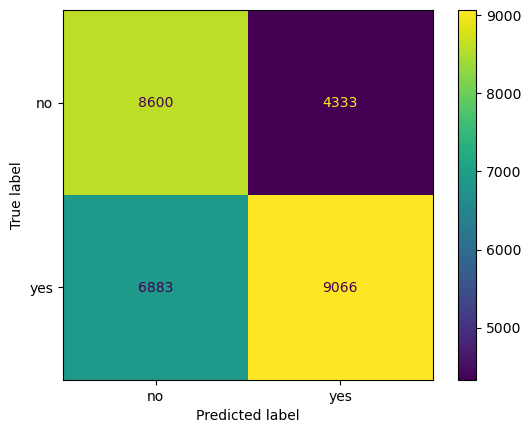

In [64]:
dec_tree = tree.DecisionTreeClassifier(class_weight="balanced", ccp_alpha=0.005)
dec_tree.fit(X_train, y_train)
y_train_pred = dec_tree.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))

#confusion matrix
cm = confusion_matrix(y_train, y_train_pred, labels=dec_tree.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=dec_tree.classes_)
disp.plot();

print(classification_report(y_train, y_train_pred))

In [65]:
text_representation = tree.export_text(dec_tree, feature_names=var_list)
print(text_representation)

|--- kw_avg_avg <= 2913.48
|   |--- is_weekend <= 0.50
|   |   |--- class: no
|   |--- is_weekend >  0.50
|   |   |--- class: yes
|--- kw_avg_avg >  2913.48
|   |--- channel_entertainment <= 0.50
|   |   |--- class: yes
|   |--- channel_entertainment >  0.50
|   |   |--- class: no



In [68]:
dot_data = tree.export_graphviz(dec_tree, feature_names=var_list, class_names=["no", "yes"])
graph = graph_from_dot_data(dot_data)
graph.write_pdf("tree.pdf")

True

**16- Test the tree you built on the test data by doing the following: (15 pts)**
* __Calculate the accuracy of the model on the test data,__
* __Plot the confusion matrix on the test data,__
* __Report the classification performance metrics on the test data,__

Test Accuracy:  0.6169505608641462
              precision    recall  f1-score   support

          no       0.55      0.67      0.61      3183
         yes       0.69      0.58      0.63      4038

    accuracy                           0.62      7221
   macro avg       0.62      0.62      0.62      7221
weighted avg       0.63      0.62      0.62      7221



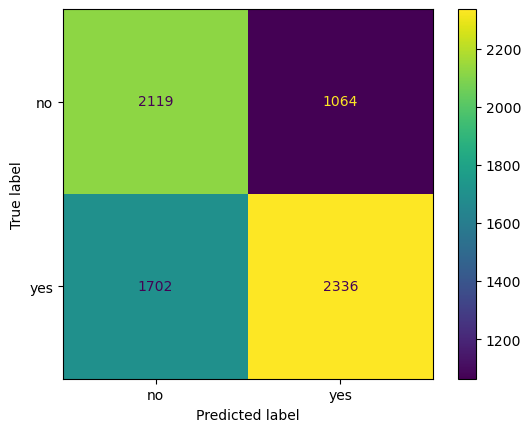

In [69]:
y_test_pred = dec_tree.predict(X_test)
print("Test Accuracy: ", accuracy_score(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred, labels=dec_tree.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=dec_tree.classes_)
disp.plot();
print(classification_report(y_test, y_test_pred))

**17- Comparing your train and test results, do you see any evidence of overfitting? Explain. (10 pts)**

Based on the results, I do not see any evidence of overfitting. The model captured the underlying patterns without excessively tailoring to the training data.

**18- Which variables are the most important ones? Sort and show the input variables based on their importance. (10 pts)**

In [70]:
df2 = pd.DataFrame({"Variable": var_list, "Importance": dec_tree.feature_importances_}).sort_values(by=["Importance"], ascending=False)
df2

,Variable,Importance
20,kw_avg_avg,0.537059
46,channel_entertainment,0.260932
24,is_weekend,0.202009
0,timedelta,0.000000
42,title_subjectivity,0.000000
32,global_rate_positive_words,0.000000
33,global_rate_negative_words,0.000000
34,rate_positive_words,0.000000
35,rate_negative_words,0.000000
36,avg_positive_polarity,0.000000


**19- Based on your model, what would you suggest to make an online new popular? (20 pts)**

Based on the model, I would suggest posting during the weekend and focusing on the most popular news channels. By doing this, you are more likely to get higher engagement which can result in better advertising deals for the company.

---
### Bonus Question

**20- Identify the most important variables using the permutation method and compare your results with the Gini-based importance method findings. (20 pts)**